In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
filepath = 'data/online-retail-dataset.xlsx'

df = pd.read_excel(filepath)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.isna().sum() # check missing value

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df[df['Description'].isna()] # find the data that has missing value

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [5]:
df_cleaned = df.dropna() # clean the missing value
df_cleaned.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
df_cleaned.info() # data information

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
df_cleaned.describe() # data statistics summary

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [8]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


number of unique description: 3896


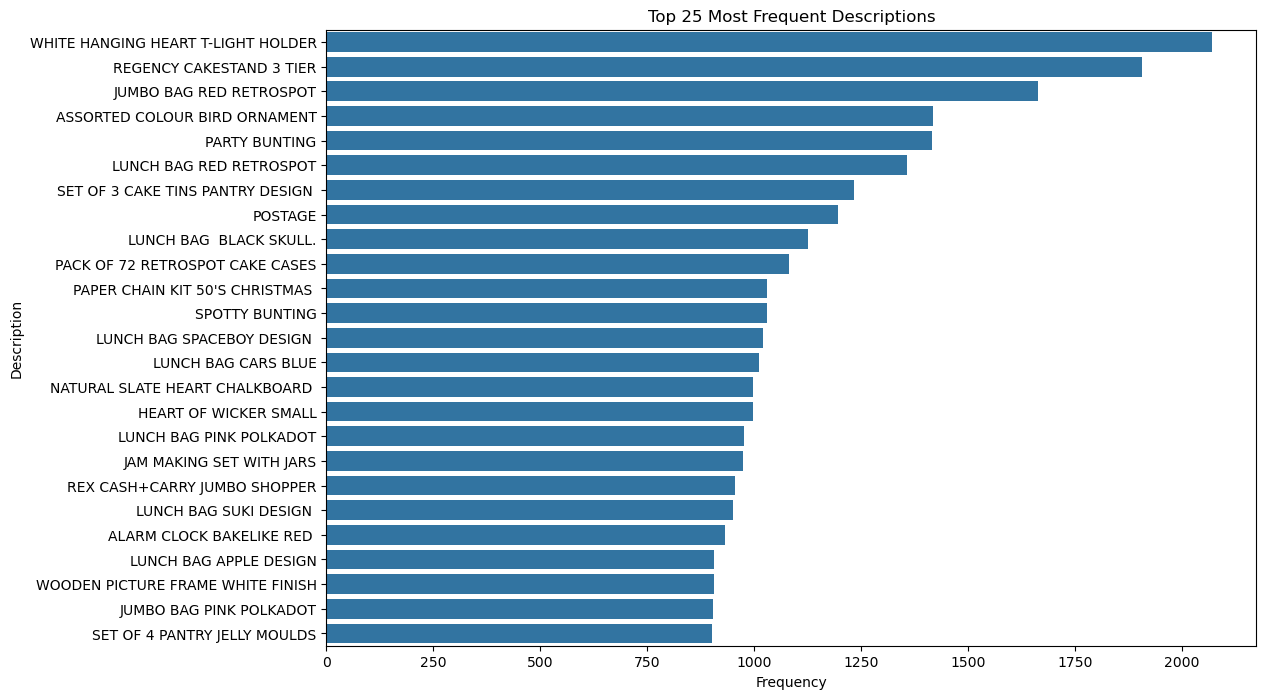

In [9]:
print('number of unique description:', df_cleaned['Description'].nunique())

desc_counts = df_cleaned['Description'].value_counts()
df_counts = desc_counts.reset_index() 
df_counts.columns = ['Description', 'Count']
df_top = df_counts.head(25)
plt.figure(figsize=(12,8))
sns.barplot(y='Description', x='Count', data=df_top)
plt.title('Top 25 Most Frequent Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Description')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4888\822319560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis') # bar plot


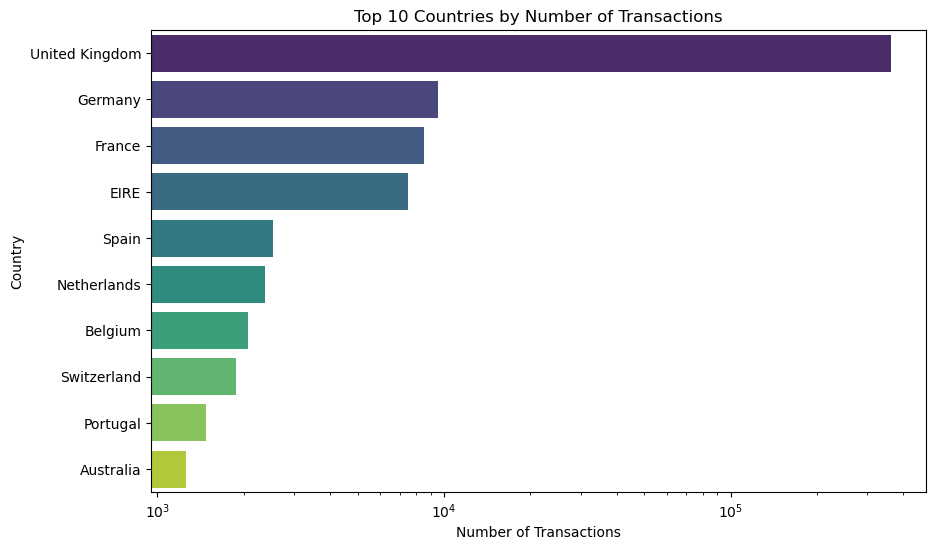

In [10]:
# top 10 countries by number of transactions
country_counts = df_cleaned['Country'].value_counts()
top_countries = country_counts.head(10)
plt.figure(figsize=(10,6))
# sns.plot(kind='pie', autopct='%1.1f%%', startangle=90) # pie chart
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis') # bar plot
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.xscale('log')
plt.show()

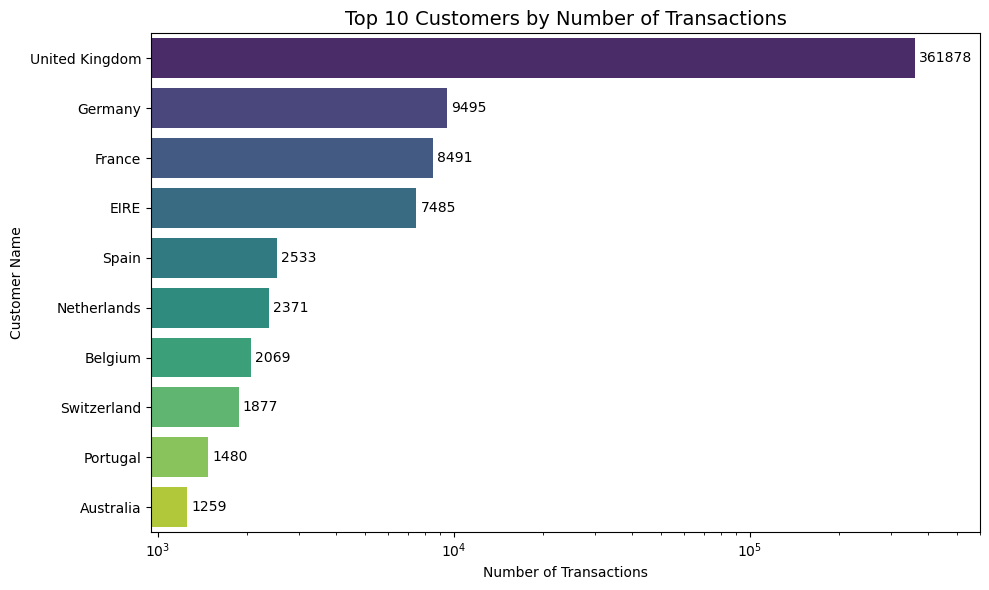

In [50]:
# top 10 countries by number of transactions # using groupby
top_country = df_cleaned.groupby(['Country']).agg(Country_count=('Country', 'count')).reset_index().sort_values(['Country_count'], ascending=[False]).head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='Country_count',
    y='Country',
    hue='Country',
    data=top_country ,
    legend=False,
    palette='viridis'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3) # add bar labels so the value is plotted on the bar
plt.title('Top 10 Customers by Number of Transactions', fontsize=14)
plt.xlabel('Number of Transactions')
plt.ylabel('Customer Name')
plt.xscale('log')
plt.xlim(right=0.6*1e6)
plt.tight_layout()
plt.show()

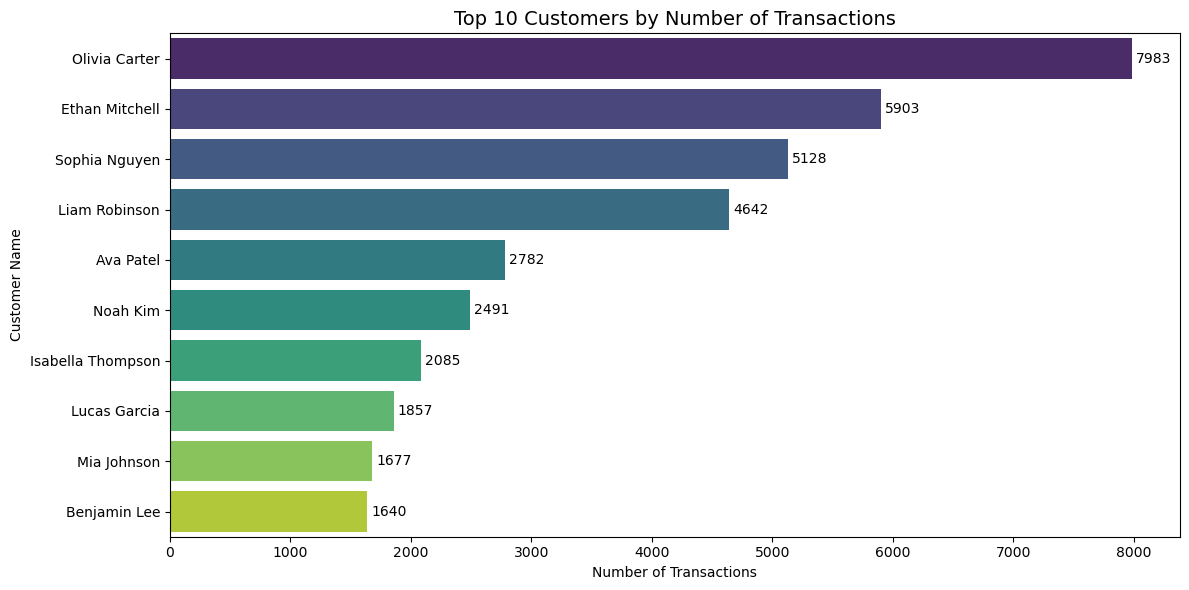

In [ ]:
# Who are our top customers?
df.columns
customer_counts = df_cleaned['CustomerID'].value_counts() # count number of transaction of a customer by counting the same CustomerID
top_customer = customer_counts.head(10)

# assign customer names (generated from GPT but realistically doable to assign CustomerID from Account Profile)
top_customer = top_customer.to_frame(name='Number of Transactions') # change to data frame
customer_names = [
    "Olivia Carter",
    "Ethan Mitchell",
    "Sophia Nguyen",
    "Liam Robinson",
    "Ava Patel",
    "Noah Kim",
    "Isabella Thompson",
    "Lucas Garcia",
    "Mia Johnson",
    "Benjamin Lee"
]

top_customer = top_customer.head(len(customer_names)) # make sure it has the same datalength
top_customer['Customer_Name'] = customer_names

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='Number of Transactions',
    y='Customer_Name',
    hue='Customer_Name',
    data=top_customer,
    legend=False,
    palette='viridis'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3) # add bar labels so the value is plotted on the bar
plt.title('Top 10 Customers by Number of Transactions', fontsize=14)
plt.xlabel('Number of Transactions')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

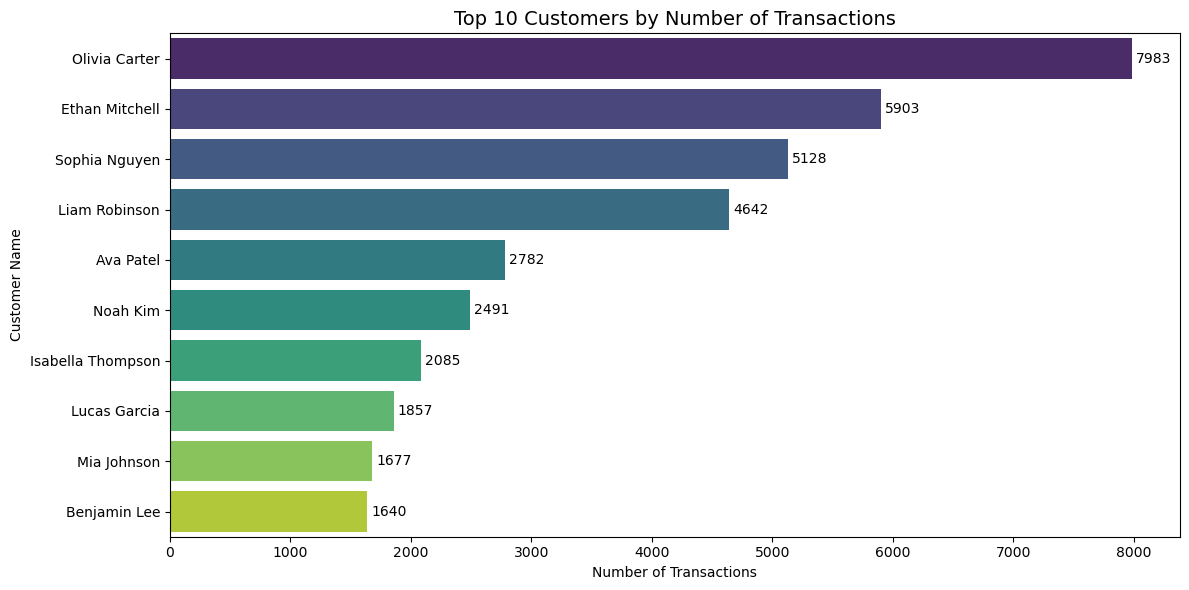

In [ ]:
# Who are our top customers?
top_customer = df_cleaned.groupby(['CustomerID']).agg(CustomerID_count=('CustomerID', 'count')).reset_index().sort_values(['CustomerID_count'], ascending=[False]).head(10)

# assign customer names (generated from GPT but realistically doable to assign CustomerID from Account Profile)
customer_names = [
    "Olivia Carter",
    "Ethan Mitchell",
    "Sophia Nguyen",
    "Liam Robinson",
    "Ava Patel",
    "Noah Kim",
    "Isabella Thompson",
    "Lucas Garcia",
    "Mia Johnson",
    "Benjamin Lee"
]

top_customer = top_customer.head(len(customer_names)) # make sure it has the same datalength
top_customer['Customer_Name'] = customer_names

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='CustomerID_count',
    y='Customer_Name',
    hue='Customer_Name',
    data=top_customer,
    legend=False,
    palette='viridis'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3) # add bar labels so the value is plotted on the bar
plt.title('Top 10 Customers by Number of Transactions', fontsize=14)
plt.xlabel('Number of Transactions')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

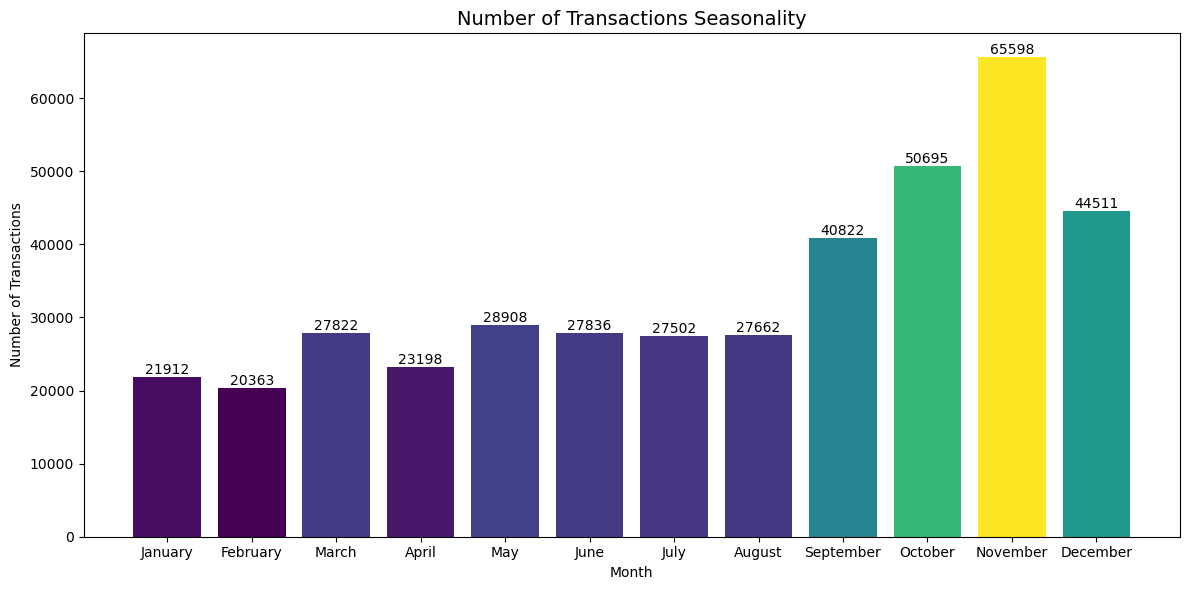

In [60]:
# What time of year should we advertise most?
import matplotlib.dates as mdates
import matplotlib as mpl

df_cleaned.loc[:, 'Month'] = df_cleaned['InvoiceDate'].dt.month_name() # .loc to explicitly modifying that DataFrame in place
num_transaction_nmonth = df_cleaned['Month'].value_counts() 
num_transaction_nmonth = num_transaction_nmonth.to_frame(name='Number of Transactions')
# sort the month from jan to dec
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
num_transaction_nmonth = (
    df_cleaned['Month']
    .value_counts()
    .reindex(month_order)
    .fillna(0)
    .to_frame(name='Number of Transactions')
)
norm = mpl.colors.Normalize( # Normalize the values for colormap
    vmin=num_transaction_nmonth['Number of Transactions'].min(),
    vmax=num_transaction_nmonth['Number of Transactions'].max()
)
colors = plt.cm.viridis(norm(num_transaction_nmonth['Number of Transactions'].values))

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(
    num_transaction_nmonth.index,
    num_transaction_nmonth['Number of Transactions'],
    color=colors
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', va='bottom')

plt.title('Number of Transactions Seasonality', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

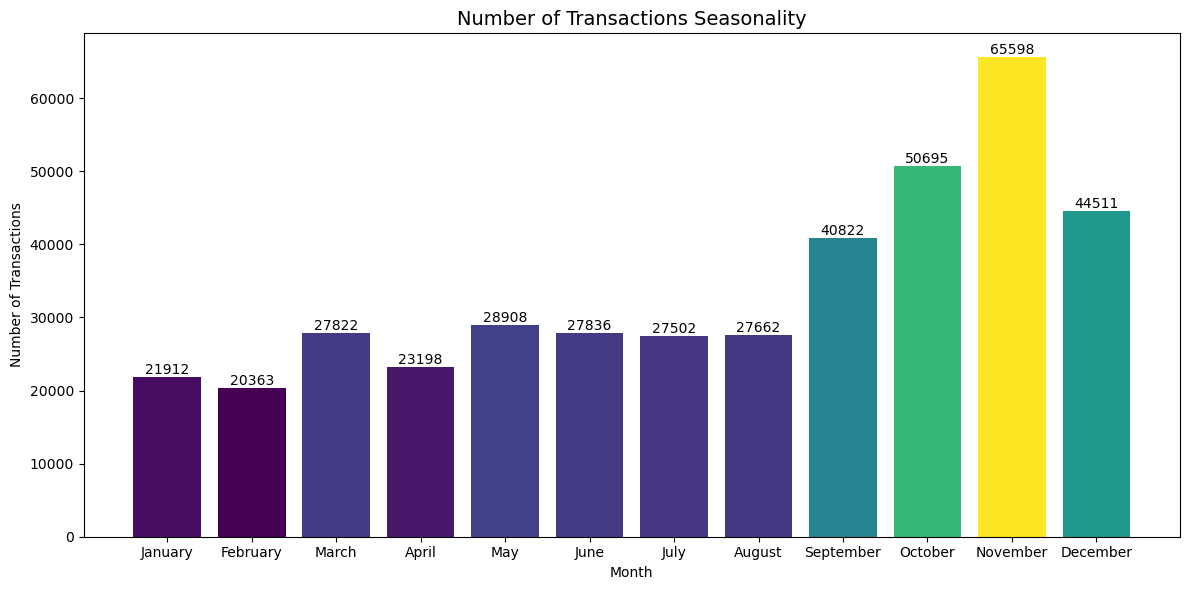

In [62]:
num_transaction_nmonth = df_cleaned.groupby(['Month']).agg(Month_count=('Month', 'count')).reset_index()

# sort the month from jan to dec
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
num_transaction_nmonth = (
    df_cleaned['Month']
    .value_counts()
    .reindex(month_order)
    .fillna(0)
    .to_frame(name='Number of Transactions')
)
norm = mpl.colors.Normalize( # Normalize the values for colormap
    vmin=num_transaction_nmonth['Number of Transactions'].min(),
    vmax=num_transaction_nmonth['Number of Transactions'].max()
)
colors = plt.cm.viridis(norm(num_transaction_nmonth['Number of Transactions'].values))

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(
    num_transaction_nmonth.index,
    num_transaction_nmonth['Number of Transactions'],
    color=colors
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', va='bottom')

plt.title('Number of Transactions Seasonality', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()